# Actions
- Create a PDF
- Include citations and bibliography
- Appendices for detiled code and output?

# Summary
- ?? high-level summary of conclusions
- ?? report objectives etc??




# Objectives & Approach

The purpose of this report is to describe the findings of a data analysis of a provided dataset of customer product review information for a snapshot of US sales activity for the JC Penney retail organisation. The report is also designed to meet the stated assignment objective of "use the data provided to demonstrate your Python data manipulation skills".

This report is structured to provide an initial summary of the main observations and then detail the supporting detail, largely following the data CRISP-DM analysis sequence. 

In each section of the report there is:
- a text description of what is being achieved and main observations
- a Python code block, with explanatory comments
- execution results

Some of the code and execution results are included in the appendices so that the main report does not become too lengthy.

***!! your code must be working, correct, and well commented and shows an appreciation of style, efficiency and reliability. All choices for methods and structures are concisely justified and alternatives are given well thought considerations.***

### CRISP-DM

The approach to the analysis follows the first four parts of the six stage "CRoss-Industry Standard Process for Data Mining' (CRISP-DM) process. ***[!! See citations url and (Ncr et al., 1999) !!]***. In summary, this process is:

1. Business Understanding: Define project objectives and requirements by collaborating with stakeholders
2. Data Understanding: Collect and explore data, analyzing its characteristics and quality
3. Data Preparation: Clean, handle missing values, and transform variables to create a structured dataset
4. Modeling: Apply various techniques such as machine learning algorithms or statistical models to the prepared data
5. Evaluation: Rigorously assess models based on predefined criteria, including performance and reliability
6. Deployment: Integrate successful models into existing systems and monitor their effectiveness


In [1]:
# General setup and imports used throughout the Jupyter Notebook
#

# Libraries For file handling and dataframes
import os
import json
from IPython.display import display
import pandas as pd 

# Libraries ....
## cccccc

# Variables used throughout the notebook
DATA_DIRECTORY = 'JCPenney_Data_Original'  # Designated data folder within the current working directory

# A simple utility function to obtain and summarise key elements of a provided dataframe
#
def print_file_summary(data_frame):
    # Create a temporary df and ensure no lists remain, so that unique items can be identified for uniquness
    temp_df = data_frame.copy()
    temp_df = temp_df.map(lambda cell: str(cell) if isinstance(cell, list) else cell)
    
    # Calculate some 
    summary_of_df = pd.DataFrame({'Count': data_frame.count(),
                                 'Missing': data_frame.isnull().sum(), 'Empty': 0,
                                 'Unique': temp_df.nunique(),
                                 'Type': data_frame.dtypes, 
                                 'String': 0, 'Int': 0, 'Float': 0, 'List': 0
                                 })
    summary_of_df['Empty'] = (data_frame == '').sum()
    summary_of_df['String'] = data_frame.map(lambda cell: isinstance(cell, str)).sum()
    summary_of_df['Int'] = data_frame.map(lambda cell: isinstance(cell, int)).sum()
    summary_of_df['Float'] = data_frame.map(lambda cell: isinstance(cell, float)).sum()
    summary_of_df['List'] = data_frame.map(lambda cell: isinstance(cell, list)).sum()

    display(summary_of_df)

# Data Exploration & Preparation

### TO DO
- 1. Data Exploration - Explore the data and show you understand its structure and relations
- 2. Data Validation - Check the quality of the data. Is it complete? Are there obvious errors?
- x. Data Preparation - Addresss the issues identified, supliment/augment the data, restructure
    - Select Data - which to use and which to exclude .. with reasoning
    - Clean Data - 'correct, impute, remove' ...
    - Construct Data - derive new attributes as needed/helpful
    - Integrate Data - new datasets, augment, other sources
    - Format Data - reformat as needed, eg string to numeric, dates, categorical  

- ?? data structure, size
- ?? data quality, missing etc

#### Data Completeness
 - Missing Data - Identify and resolve by removal or inferring. Imputation and visualisation, examining descriptive stats
- Noisy - Random errors, eg from faulty sensors, data transmission
- Duplicates - Identify and eliminate duplicates, redundancy. NB: Can occur after data integration
- Inconsistency - Data items don't align, eg DOB and age

## Data Structure & Content

The provided data sources for this analysis of JC Penney consists of two JSON files and three CSV files:
- jcpenney_products.json, jcpenney_reviewers.json; and
- products.csv, reviews.csv, users.csv.

It was not immediately obvious what the relationships between the two types of data was but the json and CSV files appear to be partial duplicates of each other; also the three CSV files hold slightly less information (eg sales price is missing from the csv files). The CSV files appear to be a first attempt to extract data from the json files (eg the json products file has a JSON field holding multiple user reviews and this has looks to have been extracted to prepare the reviews.csv file).

Given the above, the approach used in this analysis was to go back to the 'orginal' JSON files and work from these but with a sanity check against the three CSV files to make sure no data was missed or inconsistent.

### Data Sources Overview - JSON

It is assumed that the data is a snapshot extract of sales information from JC Penney databases and the bulk of this has been flattened and used to create the jcpenney_products.json file with the jcpenney_reviewers.json file providing details of individual customers.

The two tables below show the data items and key counts for each file.

In [2]:
# Load the JSON product file and examine the format and content
# NB: Use pandas json load to directly create a dataframe

# Products file source
file_name = 'jcpenney_products.json'
file_path = os.path.join(os.getcwd(), DATA_DIRECTORY, file_name)
if not os.path.isfile(file_path):
    raise Exception(f'File not found: {file_path}')

# File load into a Pandas dataframe, retained and not amended
source_jcp_products_df = pd.read_json(file_path, lines=True)
                    
# Initial look at the file and data fields
print(f'File Summary for: {file_name}')
print_file_summary(source_jcp_products_df)
print(f'First 3 Rows')
display(source_jcp_products_df.head(3))

File Summary for: jcpenney_products.json


,Count,Missing,Empty,Unique,Type,String,Int,Float,List
uniq_id,7982,0,0,7982,object,7982,0,0,0
sku,7982,0,67,6044,object,7982,0,0,0
name_title,7982,0,0,6002,object,7982,0,0,0
description,7982,0,543,5620,object,7982,0,0,0
list_price,7982,0,2166,1037,object,7982,0,0,0
sale_price,7982,0,18,2063,object,7982,0,0,0
category,7982,0,636,1169,object,7982,0,0,0
category_tree,7982,0,636,1997,object,7982,0,0,0
average_product_rating,7982,0,0,153,float64,0,0,7982,0
product_url,7982,0,0,7982,object,7982,0,0,0


First 3 Rows


,uniq_id,sku,name_title,description,list_price,sale_price,category,category_tree,average_product_rating,product_url,product_image_urls,brand,total_number_reviews,Reviews,Bought With
0,b6c0b6bea69c722939585baeac73c13d,pp5006380337,Alfred Dunner® Essential Pull On Capri Pant,You'll return to our Alfred Dunner pull-on cap...,41.09,24.16,alfred dunner,jcpenney|women|alfred dunner,2.625,http://www.jcpenney.com/alfred-dunner-essentia...,http://s7d9.scene7.com/is/image/JCPenney/DP122...,Alfred Dunner,8,"[{'User': 'fsdv4141', 'Review': 'You never hav...","[898e42fe937a33e8ce5e900ca7a4d924, 8c02c262567..."
1,93e5272c51d8cce02597e3ce67b7ad0a,pp5006380337,Alfred Dunner® Essential Pull On Capri Pant,You'll return to our Alfred Dunner pull-on cap...,41.09,24.16,alfred dunner,jcpenney|women|alfred dunner,3.000,http://www.jcpenney.com/alfred-dunner-essentia...,http://s7d9.scene7.com/is/image/JCPenney/DP122...,Alfred Dunner,8,"[{'User': 'tpcu2211', 'Review': 'You never hav...","[bc9ab3406dcaa84a123b9da862e6367d, 18eb69e8fc2..."
2,013e320f2f2ec0cf5b3ff5418d688528,pp5006380337,Alfred Dunner® Essential Pull On Capri Pant,You'll return to our Alfred Dunner pull-on cap...,41.09,24.16,view all,jcpenney|women|view all,2.625,http://www.jcpenney.com/alfred-dunner-essentia...,http://s7d9.scene7.com/is/image/JCPenney/DP122...,Alfred Dunner,8,"[{'User': 'pcfg3234', 'Review': 'You never hav...","[3ce70f519a9cfdd85cdbdecd358e5347, b0295c96d2b..."


In [3]:
# Load the JSON reviewers file and examine the format and content
# NB: Use pandas json load to directly create a dataframe

# Reviewers file source
file_name = 'jcpenney_reviewers.json'
file_path = os.path.join(os.getcwd(), DATA_DIRECTORY, file_name)
if not os.path.isfile(file_path):
    raise Exception(f'File not found: {file_path}')

# File load into a Pandas dataframe, retained and not amended
source_jcp_reviewers_df = pd.read_json(file_path, lines=True)
                    
# Initial look at the file and data fields
print(f'File Summary for: {file_name}')
print_file_summary(source_jcp_reviewers_df)
print(f'First 3 Rows')
display(source_jcp_reviewers_df.head(3))

File Summary for: jcpenney_reviewers.json


,Count,Missing,Empty,Unique,Type,String,Int,Float,List
Username,5000,0,0,4999,object,5000,0,0,0
DOB,5000,0,0,52,object,5000,0,0,0
State,5000,0,0,57,object,5000,0,0,0
Reviewed,5000,0,0,4030,object,0,0,0,5000


First 3 Rows


,Username,DOB,State,Reviewed
0,bkpn1412,31.07.1983,Oregon,[cea76118f6a9110a893de2b7654319c0]
1,gqjs4414,27.07.1998,Massachusetts,[fa04fe6c0dd5189f54fe600838da43d3]
2,eehe1434,08.08.1950,Idaho,[]


### Data Sources Overview - CSV

***TODO: Decode and compare to JSON***


### Data Structure

Looking at the content of the two files the underlieing data structure described below has been assumed.

Sales Activity - 7982 rows in the file jcpenney_products.json
- uniq_id: this uniquely identifies each of the 7982 rows. A random string
- list_price: assumed to be the price at the point of sale in $
    ***?? prices consistent accross channels, any pattern?, 18 missing ***
    *** convert to numeric**
- category_tree: breakdown of the stock catgeorisation eg 'jcpenny|women|skechers' 
- category: lowest level of category 
    *** drop this? why unique 1169 vs 1997 for the treee also ?? not same match to SKU etc eg the use of 'view all' ?? ***
- average_product_rating: rating 1 to 5 
    *** a float with some wierd values .. should be categorical? convert? ***,
    *** is this a calculated average from individual reviews? check***
- product_url: link to website product details 
    *** 7982 And these are unique to the review, not the product ... why? ***
    *** need us vpn to use this? ***
- product_image_urls: link to product image 
    *** 6519, more images than product number, less than product URL ***
- Bought with: series of items linked using the uniq_id 
    *** check these link up? and rename ***
    ***what is is useful for?***

Stock / Product - 6044 unique items in the file jcpenney_products.json
- sku: a unique 'Stock Keeping Unit', format 'xxnnnnnnnnnn', 6044 discrete values
    ***?? are all references valid format, 67 seem odd or blank or not standard format***
- name_title: name of the stock item
    ***?? uniques count about 38 less than SKU***
- description: long description of the item
    ***?? uniques count about 400 less than name***
- list_price: assumed to be the standard item price in $
    ***?? prices appear to be different for some stock, 2166 missing ***
    *** convert to numeric**
- brand: manufacturer brand name eg 'Alfred Dunner'

Customer Reviews - unique items in the file jcpenney_products.json
- total_number_reviews: number of customer reviews for each uniq_id / Sales Channel Activity
    *** is this needed, or just for a cross-check later? convert to numeric**
- Reviews: a json item with several customer reviews, each with: user, review text, score (1 to 5) 

Reviewers - 5000 rows in the filejcpenney_reviewers.json ***4999 in the CSV file***
- Username: unique string id
    ***4999 uniques, so a duplicate?**
- DOB: String date
    ***convert to date***, ***look at date range for months, days ... only 52 unique!!***
- State: string name for the state
    ***here 57 unique items, but only 50 us states?**
- Reviewed: a list of the uniq_id / Sales Activity items reviewed
    ***4030 unique vs 5000, also appear to be some empty lists***

### Links
?? Link/Cross-Ref
- 'Stock Keeping Unit' (https://en.wikipedia.org/wiki/Stock_keeping_unit)

## Create Initial Working Dataframes

The two initial source dataframes "source_jcp_products_df" and "sourcejcp_reviewers_df" were used to create three new dataframes for validation and manipulation:
- xxx sales_activity_df
- Customer Reviews: customer_reviews_df for all individual customer reviews, with uniq_id to link back to the Sales Activity
- xxx customers_df
- xxx ??? others

?? Validate each user against the users data


### Sales Activity



### Stock / Products




### Customers

The "jcpenney_reviewers.json" contains a list of reviewers or perhaps what can be considered as customers. This data was loaded and a new customer dataframe was created with each having a list of uniq_ids that link back to the sales activiy.

Two entries were duplicated, with the same customer-is but having different dates of birth and states, and linked to differtne sales activities.
*** rename code for one to continue to use??**


Duplicated Customers:


,Username,DOB,State,Reviewed
731,dqft3311,28.07.1995,Tennessee,[5f280fb338485cfc30678998a42f0a55]
2619,dqft3311,03.08.1969,New Mexico,[571b86d307f94e9e8d7919b551c6bb52]


DOB
1953-08-07    112
1998-07-27    111
1960-08-05    107
1964-08-04    107
1979-08-01    106
1965-08-04    106
1962-08-05    106
1975-08-02    106
1963-08-05    106
1999-07-27    104
1991-07-29    104
1990-07-29    103
1952-08-07    103
1974-08-02    102
1973-08-02    102
1992-07-28    101
1961-08-05    101
1970-08-03    101
1985-07-30    100
1988-07-29    100
1983-07-31     99
1987-07-30     99
1950-08-08     99
1969-08-03     99
1980-07-31     99
1982-07-31     98
1977-08-01     97
1997-07-27     97
1956-08-06     96
1958-08-06     96
1993-07-28     96
1951-08-08     95
1995-07-28     95
1959-08-06     94
1966-08-04     94
1957-08-06     93
1955-08-07     93
1968-08-03     91
1972-08-02     91
2000-07-26     90
1967-08-04     90
1971-08-03     90
1976-08-01     87
1994-07-28     86
1981-07-31     85
1986-07-30     83
1996-07-27     81
1989-07-29     81
1984-07-30     80
2001-07-26     80
1978-08-01     79
1954-08-07     79
Name: count, dtype: int64


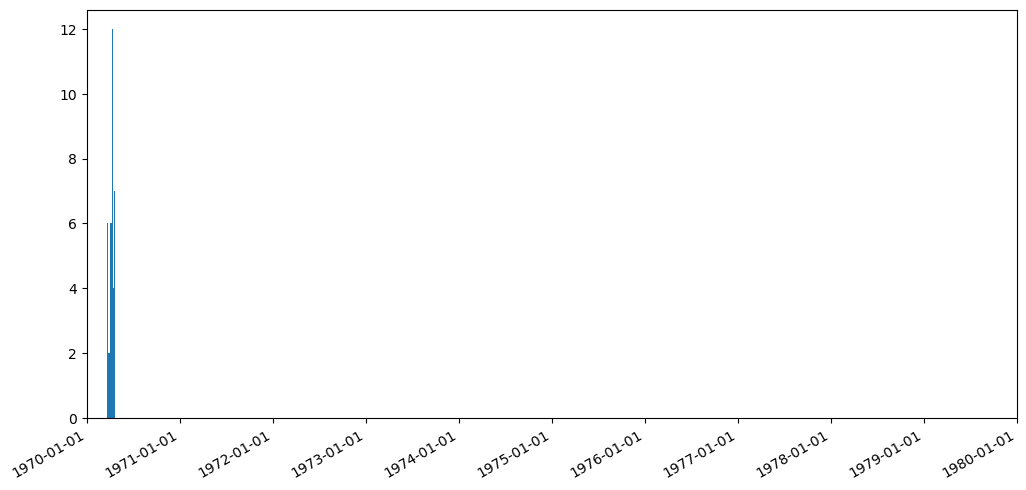

Customers by State:
Summary for customers


,Count,Missing,Empty,Unique,Type,String,Int,Float,List
customer_id,5000,0,0,4999,object,5000,0,0,0
dob,5000,0,0,52,datetime64[ns],0,0,0,0
state,5000,0,0,57,object,5000,0,0,0
uniq_id_list,5000,0,0,4030,object,0,0,0,5000


First 3 rows


,customer_id,dob,state,uniq_id_list
0,bkpn1412,1983-07-31,Oregon,[cea76118f6a9110a893de2b7654319c0]
1,gqjs4414,1998-07-27,Massachusetts,[fa04fe6c0dd5189f54fe600838da43d3]
2,eehe1434,1950-08-08,Idaho,[]


In [24]:
# Establish an initial customers  dataframe

# Create a new dataframe for all cutomer reviews
customers_df = source_jcp_reviewers_df.copy()

# Identify duplicate cutomers
duplicates_flag = customers_df.duplicated(subset=['Username'], keep=False)
duplicated = customers_df[duplicates_flag]
print(f'Duplicated Customers:')
display(duplicated)
# TODO: What action to take, drop or rename?

# DOB
# TODO: to date format
customers_df['DOB'] = pd.to_datetime(customers_df['DOB'], dayfirst=True, errors='coerce')

value_counts = customers_df['DOB'].value_counts()
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates
import datetime

print(value_counts)


fig, ax = plt.subplots(figsize=(12,6))
ax.hist(value_counts)
#ax.plot(value_counts['DOB'], value_counts['count'])
#date_form = mdates.DateFormatter("%Y-%m-%d")
ax.xaxis.set_major_formatter(date_form)
ax.set_xlim([datetime.date(1970, 1, 1), datetime.date(1980, 1, 1)])


plt.gcf().autofmt_xdate()

plt.show()

#plt.hist(value_counts)




'''
# Identify duplicate cutomers
duplicates_flag = customers_df.duplicated(subset=['Username'], keep=False)
duplicated = customers_df[duplicates_flag]
print(f'Duplicated Customers:')
display(duplicated)
'''


# TODO: unlikely looking concentration of dates

# States validate
states = customers_df.groupby('State').size().reset_index(name='counts')
print(f'Customers by State:')
#display(states)

# Reviewed validate


# Tidy up
del duplicates_flag
del duplicated
del states

# Rename customer column names and validate content for each
customers_df = customers_df.rename(columns={'Username': 'customer_id', 
                                            'DOB': 'dob', 'State': 'state',
                                            'Reviewed': 'uniq_id_list'})

# Initial look at the file and data fields
print(f'Summary for customers')
print_file_summary(customers_df)
print(f'First 3 rows')
display(customers_df.head(3))

### Customer Reviews

In the "jcpenney_products.json" file the series of JSON encoded review details were extracted and a new customer reviews dataframe was created, with individual review records linked back to the sales activiy using the uniq_id. The table below summarises the fields decoded and key counts.

There are a total of 39,063 reviews but only 29,464 appear to be unique review comments. Further analysis found that 15,535 (40%) of reviews were used by several customers, worst case being several instances of 18 customers using the same comments. This could be because the sample data has been automaticaly generated or that customer ids are being created to generate false reviews. This data has not been dropped from the dataset, although later sentiment analysis of the reviews could be misleading.

The scores for reviews in the CSV file have a large number of zero vslues (11,265 out of 39,063) and a quick examination showed that many scores differ between the JSON and CSV source. Therefore the "reviews.CSV" data source was rejected and only the JSON source was used.

In [4]:
# Establish an initial customer reviews dataframe
# By extracting the series of JSON reviews originaly in the jcpenney_products.json 

# Create a new dataframe for all cutomer reviews
customer_reviews_df = pd.DataFrame()

# TODO: This takes 4 seconds to run, replace with a more efficient approach
# Iterate through all rows of the orgonal products data, to extract and decode the series of JSON data
# Create customer review rows, each using a foreign key uniq_id for the relevant sales activity
for next_row in source_jcp_products_df.itertuples(index=False):
    temp_reviews = next_row.Reviews
    #print(f'UI: {next_row.uniq_id}, {temp_reviews}, {type(temp_reviews)}')
    temp_dict_string = json.dumps(temp_reviews)
    temp_reviews_df = pd.DataFrame(json.loads(temp_dict_string))
    temp_reviews_df.insert(0, 'uniq_id', next_row.uniq_id)
    #print(temp_reviews_df)
    customer_reviews_df = pd.concat([customer_reviews_df, temp_reviews_df])

# Tidy up
del temp_reviews
del temp_dict_string
del temp_reviews_df

# Rename customer column names and validate content for each
customer_reviews_df = customer_reviews_df.rename(columns={'User': 'customer_id', 
                                                          'Review': 'review', 'Score': 'score'})

# Initial look at the file and data fields
print(f'Summary for customer reviews')
print_file_summary(customer_reviews_df)
print(f'First 3 rows')
display(customer_reviews_df.head(3))

# ?? create products ... sales activity file without reviews
# Ensure a valid customer record exists in the customers dataframe



Summary for customer reviews


,Count,Missing,Empty,Unique,Type,String,Int,Float,List
uniq_id,39063,0,0,7982,object,39063,0,0,0
customer_id,39063,0,0,4993,object,39063,0,0,0
review,39063,0,0,29464,object,39063,0,0,0
score,39063,0,0,5,int64,0,39063,0,0


First 3 rows


,uniq_id,customer_id,review,score
0,b6c0b6bea69c722939585baeac73c13d,fsdv4141,You never have to worry about the fit...Alfred...,2
1,b6c0b6bea69c722939585baeac73c13d,krpz1113,Good quality fabric. Perfect fit. Washed very ...,4
2,b6c0b6bea69c722939585baeac73c13d,mbmg3241,I do not normally wear pants or capris that ha...,4


In [5]:
# Look at how many reviews are duplicates and how many customers are linked to these

duplicates_by_customer = customer_reviews_df.groupby('review')['customer_id'].size().reset_index()
reviews_duplicated = duplicates_by_customer.groupby('customer_id').count().reset_index()

count_reviews_single = reviews_duplicated[reviews_duplicated['customer_id'] == 1]
count_reviews_duplicated = len(customer_reviews_df) - count_reviews_single['review'].sum()
max_duplicates = reviews_duplicated['customer_id'].max()

print(f'Out of a total of {len(customer_reviews_df)} reviews {count_reviews_duplicated} are duplicates.')
print(f'Or approximately {((count_reviews_duplicated/len(customer_reviews_df)) * 100):.0f}%')
print(f'Several worst case situations with {max_duplicates} customers using the same review comments.')


Out of a total of 39063 reviews 15535 are duplicates.
Or approximately 40%
Several worst case situations with 18 customers using the same review comments.


In [26]:
# Load the CSV reviews file to cross-check against the data extracted from the JSON sourced reviews

# Load the reviews .csv file, exit if do not exist or are invalid
file_path = os.path.join(os.getcwd(), DATA_DIRECTORY, 'reviews.csv')
if not os.path.isfile(file_path):
    raise Exception(f"File not found: {file_path}")
source_reviewsCSV_df = pd.read_csv(file_path)

# Initial look at the file and data fields
print(f'Summary for customer reviews - CSV')
print_file_summary(source_reviewsCSV_df)
print(f'First 3 rows')
display(source_reviewsCSV_df.head(3))

# Scores look very different

count_zero_scores = source_reviewsCSV_df[source_reviewsCSV_df['Score'] == 0]['Score'].count()
count_zero_scoresJSON = customer_reviews_df[customer_reviews_df['score'] == 0]['score'].count()

print(f'Compare JSON sourced review vs CSV file source')
print(f'Count:  {len(customer_reviews_df)} vs {len(source_reviewsCSV_df)}')
print(f'Scores with zero: {count_zero_scoresJSON:.0f} vs {count_zero_scores:.0f}')
print(f'Mean:  {customer_reviews_df['score'].mean():.1f} vs {source_reviewsCSV_df['Score'].mean():.1f}')


Summary for customer reviews - CSV


,Count,Missing,Empty,Unique,Type,String,Int,Float,List
Uniq_id,39063,0,0,7982,object,39063,0,0,0
Username,39063,0,0,4993,object,39063,0,0,0
Score,39063,0,0,6,int64,0,39063,0,0
Review,39063,0,0,29463,object,39063,0,0,0


First 3 rows


,Uniq_id,Username,Score,Review
0,b6c0b6bea69c722939585baeac73c13d,fsdv4141,2,You never have to worry about the fit...Alfred...
1,b6c0b6bea69c722939585baeac73c13d,krpz1113,1,Good quality fabric. Perfect fit. Washed very ...
2,b6c0b6bea69c722939585baeac73c13d,mbmg3241,2,I do not normally wear pants or capris that ha...


Compare JSON sourced review vs CSV file source
Count:  39063 vs 39063
Scores with zero: 0 vs 11265
Mean:  3.0 vs 1.5


### Observations


- 4993 users x-check

# Data Visualisation

 3. Data Visualisation - Gain an overall understanding of the data with visualisations

- Initial review, plots etc
- Initial observations, insights

# Data Analysis

 4. Data Analysis = Set some questions and use the data to answer them
 5. Data Augmentation - Add new data from another source to bring new insights to the data you already have

# References

See the CRISP-DM in the intro
- https://www.datascience-pm.com/crisp-dm-2/
- (Ncr et al., 1999) ........ Ncr, P.C. et al. (1999) ‘CRISP-DM 1.0’.